In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
a=pd.get_dummies(df)
print(a)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                      140         0              1            0   
1                       80         0              1            0   
2                      158 

In [7]:
X = a.drop('diabetes', axis=1)
y = a['diabetes']

In [8]:
z=0
o=0
for i in y:
    if i==0:
        z+=1
    else:
        o+=1
print(z,o)
'''that is why we are using precision recall'''

91500 8500


'that is why we are using precision recall'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
columns_to_normalize = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
scaler = MinMaxScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

In [11]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [12]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}


In [13]:
def classifier_predict(to_predct, y_actual):
    y_pred = classifier.predict(to_predct)
    print(classification_report(y_actual, y_pred))
    print("Accuracy on set:", roc_auc_score(y_actual, y_pred),
          precision_score(y_actual, y_pred),
          recall_score(y_actual, y_pred))

In [14]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

classifier_predict(X_train,y_train)



              precision    recall  f1-score   support

           0       0.97      1.00      0.99     54863
           1       0.99      0.69      0.81      5137

    accuracy                           0.97     60000
   macro avg       0.98      0.84      0.90     60000
weighted avg       0.97      0.97      0.97     60000

Accuracy on set: 0.8426798589968902 0.9871184542145057 0.6861981701382129


In [15]:
num_folds = 5


model = LogisticRegression()


model.fit(X_train, y_train)



/Users/adrinesaghatelyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df['importance'] = feature_importances_df['importance'].round(14)
# Display
feature_importances_df

,feature,importance
4,HbA1c_level,0.642729
5,blood_glucose_level,0.315987
0,age,0.022636
3,bmi,0.010043
1,hypertension,0.004350
2,heart_disease,0.003040
9,smoking_history_No Info,0.000902
7,gender_Male,0.000204
11,smoking_history_ever,0.000073
12,smoking_history_former,0.000024


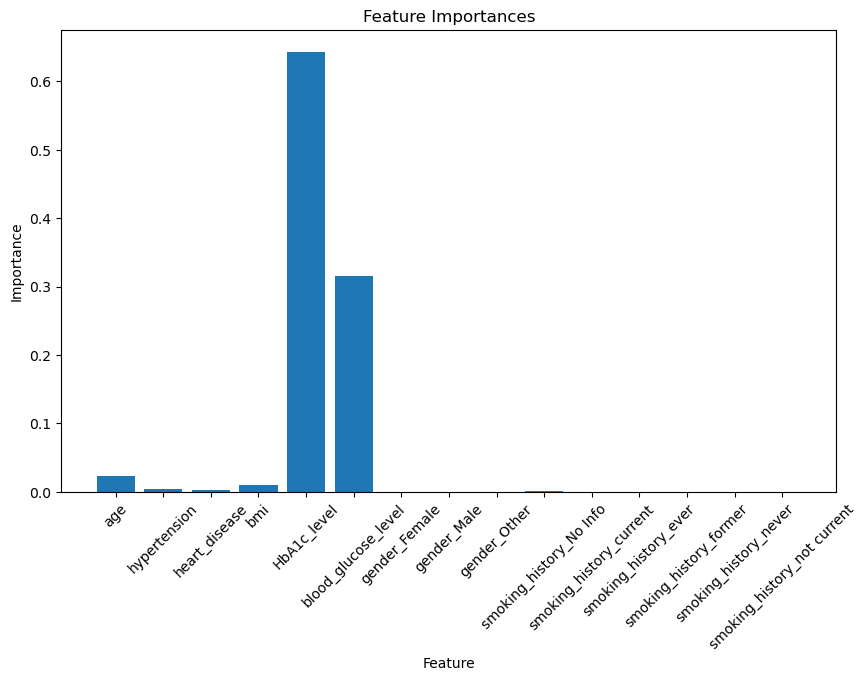

In [17]:
sorted_indices = sorted(range(len(feature_importances_df['importance'])), 
                        key=lambda i: feature_importances_df['importance'].iloc[i], reverse=True)
sorted_importances = [feature_importances_df['importance'][i] for i in sorted_indices]
sorted_feature_names = [feature_importances_df['feature'][i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [18]:
grid_search = GridSearchCV(classifier, param_grid, cv=2, scoring='accuracy',verbose=16)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START learning_rate=0.01, max_depth=3, n_estimators=50............
[CV 1/2; 1/8] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.914 total time=   1.1s
[CV 2/2; 1/8] START learning_rate=0.01, max_depth=3, n_estimators=50............
[CV 2/2; 1/8] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.914 total time=   1.1s
[CV 1/2; 2/8] START learning_rate=0.01, max_depth=3, n_estimators=100...........
[CV 1/2; 2/8] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.972 total time=   2.0s
[CV 2/2; 2/8] START learning_rate=0.01, max_depth=3, n_estimators=100...........
[CV 2/2; 2/8] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.971 total time=   1.7s
[CV 1/2; 3/8] START learning_rate=0.01, max_depth=4, n_estimators=50............
[CV 1/2; 3/8] END learning_rate=0.01, max_depth=4, n_estimators=50;, score=0.914 total time=   1.1s
[CV 2/2; 3/8] START learning_rate

In [19]:
classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)
classifier.fit(X_train, y_train)
classifier_predict(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     54863
           1       0.99      0.69      0.81      5137

    accuracy                           0.97     60000
   macro avg       0.98      0.85      0.90     60000
weighted avg       0.97      0.97      0.97     60000

Accuracy on set: 0.8457518659456161 0.9888765294771968 0.692232820712478


In [20]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,HbA1c_level,0.641739
5,blood_glucose_level,0.316414
0,age,0.018183
3,bmi,0.014360
1,hypertension,0.004292
2,heart_disease,0.003277
9,smoking_history_No Info,0.000987
7,gender_Male,0.000216
12,smoking_history_former,0.000194
10,smoking_history_current,0.000129


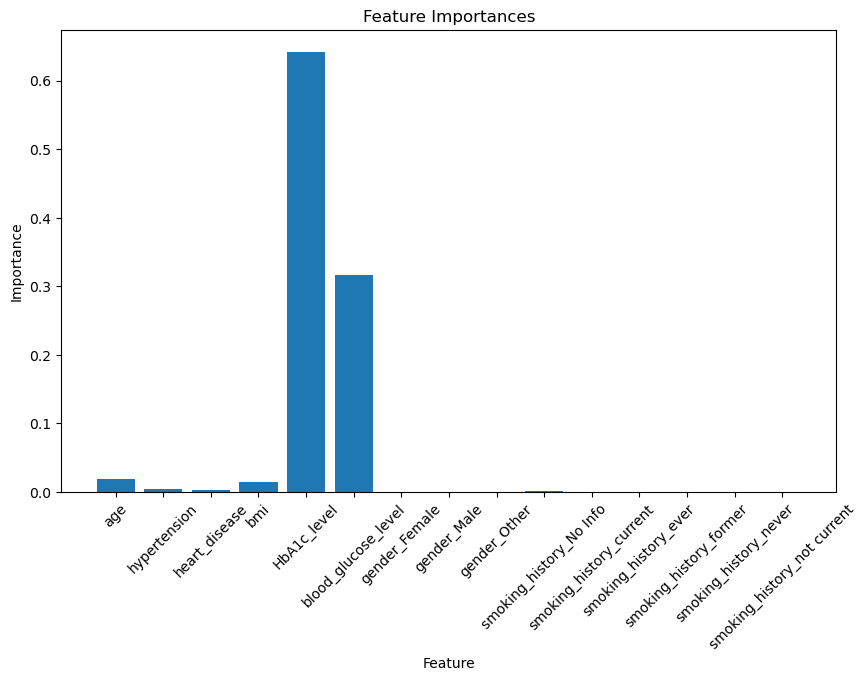

In [21]:
 sorted_indices = sorted(range(len(feature_importances_df['importance'])), 
                        key=lambda i: feature_importances_df['importance'].iloc[i], reverse=True)
sorted_importances = [feature_importances_df['importance'][i] for i in sorted_indices]
sorted_feature_names = [feature_importances_df['feature'][i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()
    

In [22]:
Older_Smoker=np.zeros(shape=(60000,))
Older_Smoker=(X_train['age']>0.5)&(X_train['smoking_history_current']==1)
Older_Smoker=Older_Smoker.astype(int)
X_train['Older_Smoker']=Older_Smoker


In [23]:
Older_Smoker=np.zeros(shape=(20000,))
Older_Smoker=(X_validation['age']>0.5)&(X_validation['smoking_history_current']==1)
Older_Smoker=Older_Smoker.astype(int)
X_validation['Older_Smoker']=Older_Smoker

In [24]:
X_train['High_Glucose_High_BMI']=X_train['blood_glucose_level']*X_train['bmi']

In [25]:
X_validation['High_Glucose_High_BMI']=X_validation['blood_glucose_level']*X_validation['bmi']

In [26]:
HeartDisease_Smoker=np.zeros(shape=(60000,))
HeartDisease_Smoker = (X_train['heart_disease'] == 1) & (X_train['smoking_history_current'] == 1)
HeartDisease_Smoker = HeartDisease_Smoker.astype(int)
X_train['HeartDisease_Smoker']=HeartDisease_Smoker

In [27]:
HeartDisease_Smoker=np.zeros(shape=(20000,))
HeartDisease_Smoker = (X_validation['heart_disease'] == 1) & (X_validation['smoking_history_current'] == 1)
HeartDisease_Smoker = HeartDisease_Smoker.astype(int)
X_validation['HeartDisease_Smoker']=HeartDisease_Smoker

In [28]:
pd.options.display.max_columns=150
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,Older_Smoker,High_Glucose_High_BMI,HeartDisease_Smoker
29235,0.486987,0,0,0.340686,0.563636,0.045455,0,1,0,1,0,0,0,0,0,0,0.015486,0
92951,0.649650,1,0,0.259804,0.490909,0.354545,1,0,0,0,0,0,0,1,0,0,0.092112,0
35129,0.449449,0,0,0.127801,0.400000,0.227273,1,0,0,1,0,0,0,0,0,0,0.029046,0
19490,0.161662,0,0,0.077848,0.563636,0.045455,0,1,0,0,0,0,0,1,0,0,0.003539,0
50514,0.749750,0,0,0.202031,0.090909,0.295455,0,1,0,0,0,0,0,1,0,0,0.059691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14048,0.762262,1,0,0.204248,0.454545,0.227273,0,1,0,0,0,0,0,1,0,0,0.046420,0
25263,0.449449,1,0,0.202031,0.545455,0.000000,0,1,0,0,0,0,0,0,1,0,0.000000,0
85817,0.224224,0,0,0.152194,0.000000,0.272727,0,1,0,1,0,0,0,0,0,0,0.041508,0
12238,0.474474,0,0,0.160598,0.472727,0.359091,1,0,0,0,0,0,1,0,0,0,0.057669,0


In [29]:
High_Glucose_HeartDisease=np.zeros(shape=(60000,))
High_Glucose_HeartDisease = (X_train['heart_disease'] == 1) & (X_train['blood_glucose_level']>0.6)
High_Glucose_HeartDisease = High_Glucose_HeartDisease.astype(int)
X_train['High_Glucose_HeartDisease']=High_Glucose_HeartDisease

In [30]:
High_Glucose_HeartDisease=np.zeros(shape=(60000,))
High_Glucose_HeartDisease = (X_validation['heart_disease'] == 1) & (X_validation['blood_glucose_level']>0.6)
High_Glucose_HeartDisease = High_Glucose_HeartDisease.astype(int)
X_validation['High_Glucose_HeartDisease']=High_Glucose_HeartDisease

In [31]:
grid_search = GridSearchCV(classifier, param_grid, cv=2, scoring='accuracy',verbose=16)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START learning_rate=0.01, max_depth=3, n_estimators=50............
[CV 1/2; 1/8] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.914 total time=   1.3s
[CV 2/2; 1/8] START learning_rate=0.01, max_depth=3, n_estimators=50............
[CV 2/2; 1/8] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.914 total time=   1.1s
[CV 1/2; 2/8] START learning_rate=0.01, max_depth=3, n_estimators=100...........
[CV 1/2; 2/8] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.972 total time=   2.2s
[CV 2/2; 2/8] START learning_rate=0.01, max_depth=3, n_estimators=100...........
[CV 2/2; 2/8] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.971 total time=   2.2s
[CV 1/2; 3/8] START learning_rate=0.01, max_depth=4, n_estimators=50............
[CV 1/2; 3/8] END learning_rate=0.01, max_depth=4, n_estimators=50;, score=0.914 total time=   1.4s
[CV 2/2; 3/8] START learning_rate

In [32]:
classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
classifier.fit(X_train, y_train)
classifier_predict(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54863
           1       1.00      0.67      0.80      5137

    accuracy                           0.97     60000
   macro avg       0.98      0.83      0.89     60000
weighted avg       0.97      0.97      0.97     60000

Accuracy on set: 0.8348684252101215 0.9982593559617058 0.66984621374343


In [33]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)


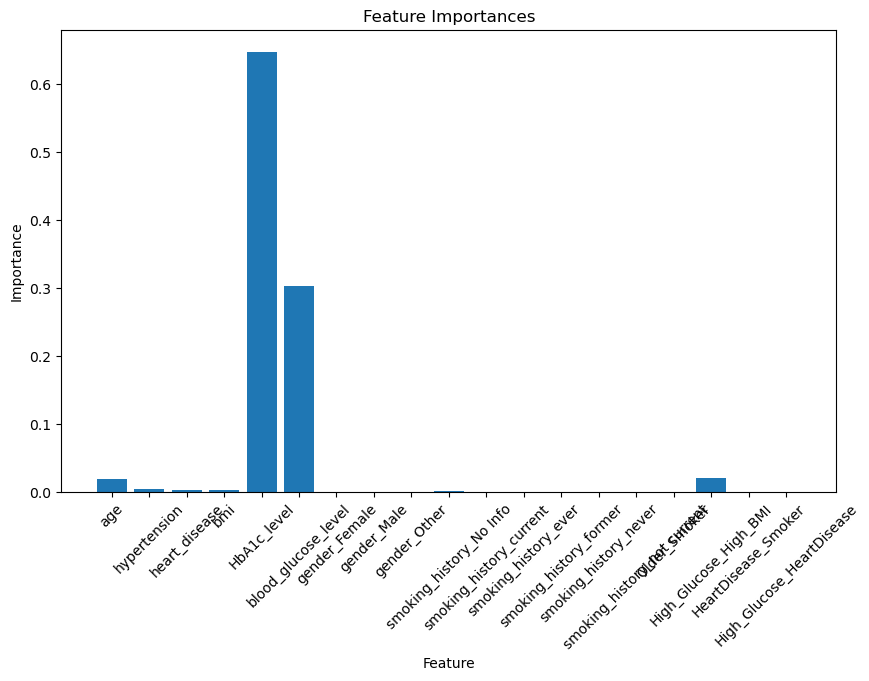

In [34]:
sorted_indices = sorted(range(len(feature_importances_df['importance'])), 
                        key=lambda i: feature_importances_df['importance'].iloc[i], reverse=True)
sorted_importances = [feature_importances_df['importance'][i] for i in sorted_indices]
sorted_feature_names = [feature_importances_df['feature'][i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [42]:
def optimize_gb(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf):
    # Ensure hyperparameters are in the appropriate range and format
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Create and train model
    clf = GradientBoostingClassifier(n_estimators=n_estimators,
                                     learning_rate=learning_rate,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
    return cross_val_score(clf, X_train, y_train, cv=5).mean()

In [43]:
from bayes_opt import BayesianOptimization

# Define hyperparameter bounds
pbounds = {
    'n_estimators': (10, 500),
    'learning_rate': (0.001, 0.5),
    'max_depth': (3, 10),
    'min_samples_split': (2, 100),
    'min_samples_leaf': (1, 100)
}

optimizer = BayesianOptimization(f=optimize_gb, pbounds=pbounds, random_state=1,verbose=2)

# Optimize
optimizer.maximize(init_points=2, n_iter=2)
print(optimizer.max)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9694    | 0.2091    | 8.042     | 1.011     | 31.63     | 81.91     |
| 2         | 0.9718    | 0.04708   | 4.304     | 35.21     | 40.88     | 274.0     |
| 3         | 0.9702    | 0.2075    | 4.88      | 36.35     | 45.17     | 272.5     |
| 4         | 0.9702    | 0.1506    | 6.209     | 59.03     | 74.82     | 242.4     |
{'target': 0.9718333333333333, 'params': {'learning_rate': 0.0470769587896301, 'max_depth': 4.303821479643696, 'min_samples_leaf': 35.210511977261724, 'min_samples_split': 40.883212474605656, 'n_estimators': 274.0201996616449}}


In [45]:
classifier = GradientBoostingClassifier(learning_rate = 0.0470769587896301,
                                        max_depth = 4,
                                        min_samples_leaf = 35, 
                                        min_samples_split = 40, 
                                        n_estimators = 274)
classifier.fit(X_train, y_train)
classifier_predict(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     54863
           1       0.99      0.69      0.82      5137

    accuracy                           0.97     60000
   macro avg       0.98      0.85      0.90     60000
weighted avg       0.97      0.97      0.97     60000

Accuracy on set: 0.8469472036617545 0.9897364771151179 0.6945688144831613


In [46]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

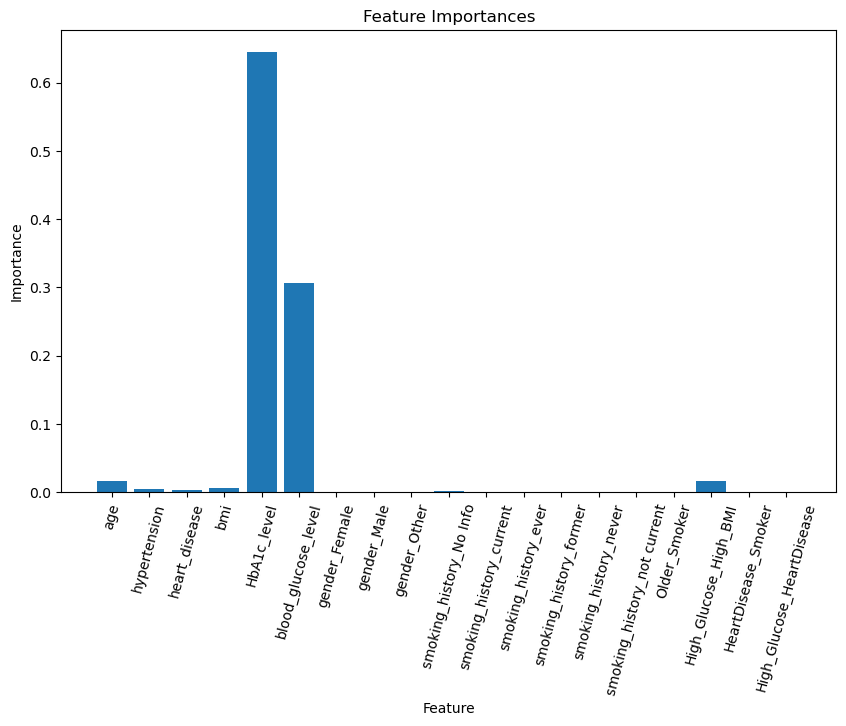

In [48]:
sorted_indices = sorted(range(len(feature_importances_df['importance'])), 
                        key=lambda i: feature_importances_df['importance'].iloc[i], reverse=True)
sorted_importances = [feature_importances_df['importance'][i] for i in sorted_indices]
sorted_feature_names = [feature_importances_df['feature'][i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=75)
plt.show()